In [1]:
import numpy as np
import numpy.linalg as la
from matplotlib import pyplot as plt
from copy import deepcopy

from graph_tools import Graph
from laplacian_tools import Laplacian_Handler

# Original Graph

In [2]:
waypoints = np.array([
    [0, 0],
    [10, 0],
    [10, 10],
    [0, 0],
    [0, -10],
    [10, -10],
    [10, 0],
    [0, 0],
    [0, 10]
])

Laplacian: 1645581833.9999921


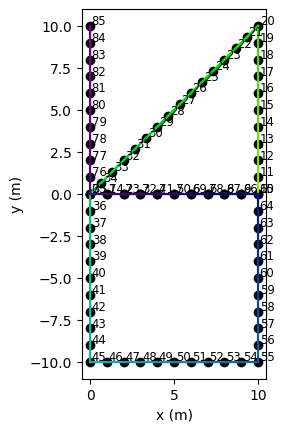

In [8]:
g = Graph(waypoints=waypoints)
g.plot()
l = Laplacian_Handler(g)
print(f"Laplacian: {l.lap_det}")
f = plt.gcf()
# f.set_dpi(300)
# plt.savefig("/home/masonbp/class/18.0651_matrix/project/18.0651_final/figs/original_graph.pdf")

1645581833.9999921
1645581833.9999921
35439083160.99979
169809497263.9998
37579003370.99978
93703293598.0006
38251951460.99978
95765971671.00029
38944166597.99977
97617497475.99876
39610277046.99977
99350871070.00105
41883510968.99976
105214150602.00073
42469362978.99977
106725480536.00038
44658036809.999756
112369272876.0003
45158014070.999756
113689462986.00076
47262321512.99975
119557558425.99965
49366927116.99974
131384793935.00067
48820220891.999756
48820220891.99997
48163408236.999756
48163408236.999275
49042070985.99976
49042070986.00016
48165045470.99976
48165045471.00002
48823495359.99977
48823495360.00017
47726256984.99978
47726256985.00001
48164494013.99977
48164494013.99998
48492624612.99978
48492624612.99935
48710648781.99976
48710648782.00036
47172984686.99978
47172984687.00023
47170795995.99978
47170795995.99966
45412919040.99978
45412919040.999794
45190517489.99978
45190517489.99998
43212427674.999794
43212427674.999825
42769813263.999794
42769813264.00012
42217092422.9

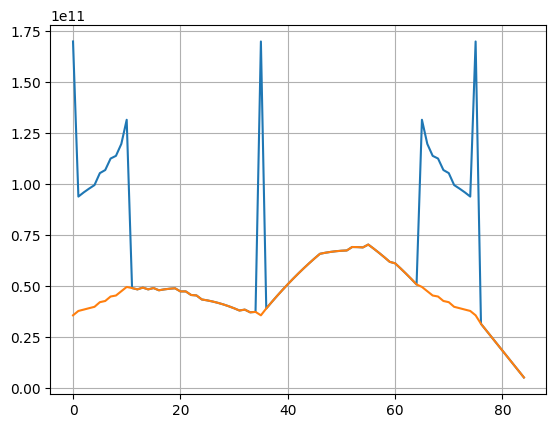

In [10]:
print(l.lap_det)
print(la.det(g.reduced_laplacian()))
orig_det = la.det(g.reduced_laplacian())

lap_dets = []
lap_dets_est = []
lap_dets_minus_odom = []
num_odom = []
for i in range(85):
    new_lap_det = l.simulate_traveling_to_waypoint(l.graph.graph_keys[i])
    print(new_lap_det)
    lap_dets_est.append(new_lap_det)
    # lap_dets_minus_odom.append(new_lap_det - np.exp(l.num_odom_to_waypoint(l.graph.graph_keys[i])))
    num_odom.append(l.num_odom_to_waypoint(l.graph.graph_keys[i]))
    g_cp = deepcopy(g)
    g_cp.add_nodes_to_waypoint(g.graph_keys[i])
    # print(g.graph_keys[i])
    # g_cp.plot()
    lap_dets.append(la.det(g_cp.reduced_laplacian()))
    print(lap_dets[-1])
    # lap_dets.append(new_lap_det)
    # print(f"{i}: {new_lap_det}")
print(np.max(lap_dets))
    
print(f"Laplacian:\n")
np.set_printoptions(threshold=100000)
for i, row in enumerate(l.lap):
# for i, row in enumerate(g.adjacency_matrix()):
    print(f"{i}: {row}")
    
for i in g.graph_edges:
    print(f"{i}: {g.graph_edges[i]}")
    
for i, row in enumerate(g.laplacian()):
    assert np.sum(row) == 0, f"sum is not 1: {i}: {row}"
    
plt.plot(np.arange(85), lap_dets)
plt.plot(np.arange(85), lap_dets_est)
# plt.plot(np.arange(85), lap_dets_minus_odom)
plt.grid(True)

optimal node without odometry penalty: 55
optimal node with odometry penalty: 24


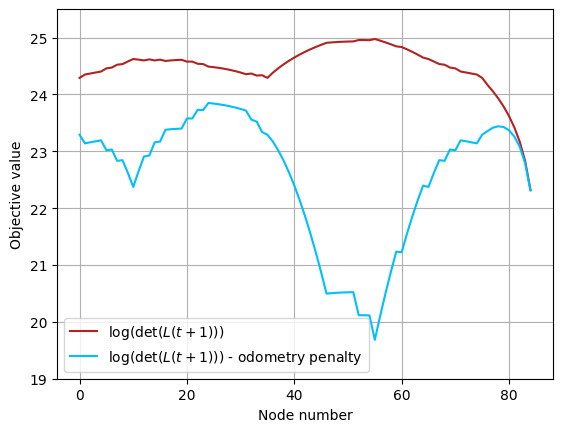

In [23]:
# plt.plot(np.arange(85), np.log(lap_dets))
plt.plot(np.arange(85), np.log(lap_dets_est), color='firebrick', label=r"log(det($L(t+1)$))")
plt.plot(np.arange(85), np.log(lap_dets_est) - 1e-2*np.array(num_odom)**2, color='deepskyblue', label=r"log(det($L(t+1)$)) - odometry penalty")
# plt.plot(np.arange(85), lap_dets_minus_odom)
plt.grid(True)
plt.legend()
plt.ylim(19, 25.5)
plt.ylabel("Objective value")
plt.xlabel("Node number")
# f = plt.gcf()
# f.set_dpi(300)
# plt.savefig("/home/masonbp/class/18.0651_matrix/project/18.0651_final/figs/demo_dets.pdf")
print(f"optimal node without odometry penalty: {np.argmax(np.log(lap_dets_est))}")
print(f"optimal node with odometry penalty: {np.argmax( np.log(lap_dets_est) - 1e-2*np.array(num_odom)**2)}")